# EDA Y VISUALIZACIÓN

In [42]:
# importamos las librerías con las que vamos a trabajar

# Trabajar con bases de datos y python
# -----------------------------------------------------------------------
import psycopg2
from psycopg2 import OperationalError, errorcodes, errors


# Trabajar con DataFrames
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from dotenv import load_dotenv

import sys
sys.path.append("../")
from src import bd as bd
from src import tablas_insercion as ti

import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots


load_dotenv()


True

In [8]:
user = os.getenv("USUARIO")
password = os.getenv("PASSWORD")
host = os.getenv("HOST")
database = os.getenv("NOMBRE")

In [9]:
import psycopg2

conn = psycopg2.connect(
    user= user,
    password= password,
    host= host,
    database= database
)

cursor = conn.cursor()


#### Visualización 1

In [10]:
query1 = """
SELECT 
    p.precio,
    p.fecha,
    c.nombre AS categoria,
    s.nombre AS supermercado
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
JOIN 
    supermercados s ON p.id_supermercado = s.id;

"""

cursor.execute(query1)
df_query1 = pd.DataFrame(cursor.fetchall(),columns=["precio","fecha","categoria","super"])
df_query1


,precio,fecha,categoria,super
0,1.45,2024-07-12,aceite de girasol,mercadona
1,1.45,2024-07-13,aceite de girasol,mercadona
2,1.45,2024-07-14,aceite de girasol,mercadona
3,1.45,2024-07-15,aceite de girasol,mercadona
4,1.45,2024-07-16,aceite de girasol,mercadona
...,...,...,...,...
275571,4.73,2024-10-23,leche,alcampo
275572,4.73,2024-10-24,leche,alcampo
275573,4.73,2024-10-25,leche,alcampo
275574,4.73,2024-10-26,leche,alcampo


#### Visualización 2

In [13]:
query2 = """
SELECT 
    p.precio,
    p.fecha,
    c.nombre AS categoria,
    s.nombre AS supermercado
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
JOIN 
    supermercados s ON p.id_supermercado = s.id;

"""

cursor.execute(query2)
df_query2 = pd.DataFrame(cursor.fetchall(),columns=["precio","fecha","categoria","super"])
df_query2


,precio,fecha,categoria,super
0,1.45,2024-07-12,aceite de girasol,mercadona
1,1.45,2024-07-13,aceite de girasol,mercadona
2,1.45,2024-07-14,aceite de girasol,mercadona
3,1.45,2024-07-15,aceite de girasol,mercadona
4,1.45,2024-07-16,aceite de girasol,mercadona
...,...,...,...,...
275571,4.73,2024-10-23,leche,alcampo
275572,4.73,2024-10-24,leche,alcampo
275573,4.73,2024-10-25,leche,alcampo
275574,4.73,2024-10-26,leche,alcampo


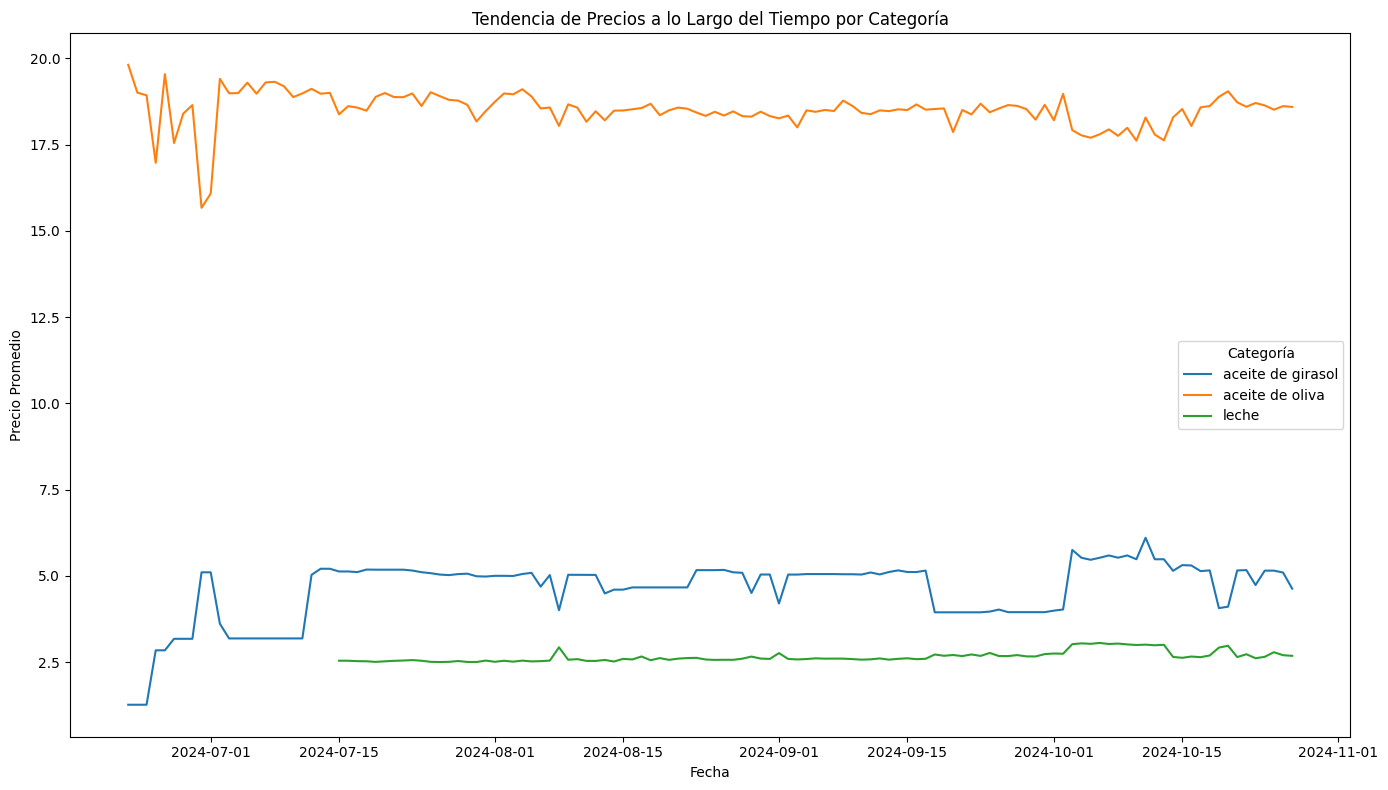

In [14]:
df_query2['fecha'] = pd.to_datetime(df_query2['fecha'])

precio_promedio_tiempo = df_query2.groupby(['fecha', 'categoria'])['precio'].mean().reset_index()

plt.figure(figsize=(14, 8))
for categoria in precio_promedio_tiempo['categoria'].unique():
    subset = precio_promedio_tiempo[precio_promedio_tiempo['categoria'] == categoria]
    plt.plot(subset['fecha'], subset['precio'], label=categoria)

plt.title('Tendencia de Precios a lo Largo del Tiempo por Categoría')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

#### Visualización 3

#### Visualización 4

In [21]:
query4 = """
SELECT 
    c.nombre AS categoria,
    s.nombre AS supermercado,
    COUNT(DISTINCT p.producto) AS cantidad_productos_unicos
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
JOIN 
    supermercados s ON p.id_supermercado = s.id
GROUP BY 
    c.nombre, s.nombre;
"""

cursor.execute(query4)
df_query4 = pd.DataFrame(cursor.fetchall(), columns = ["categoria","super","numero"])
df_query4

,categoria,super,numero
0,aceite de girasol,alcampo,17
1,aceite de girasol,carrefour,15
2,aceite de girasol,dia,7
3,aceite de girasol,eroski,12
4,aceite de girasol,hipercor,11
5,aceite de girasol,mercadona,2
6,aceite de oliva,alcampo,141
7,aceite de oliva,carrefour,126
8,aceite de oliva,dia,38
9,aceite de oliva,eroski,123


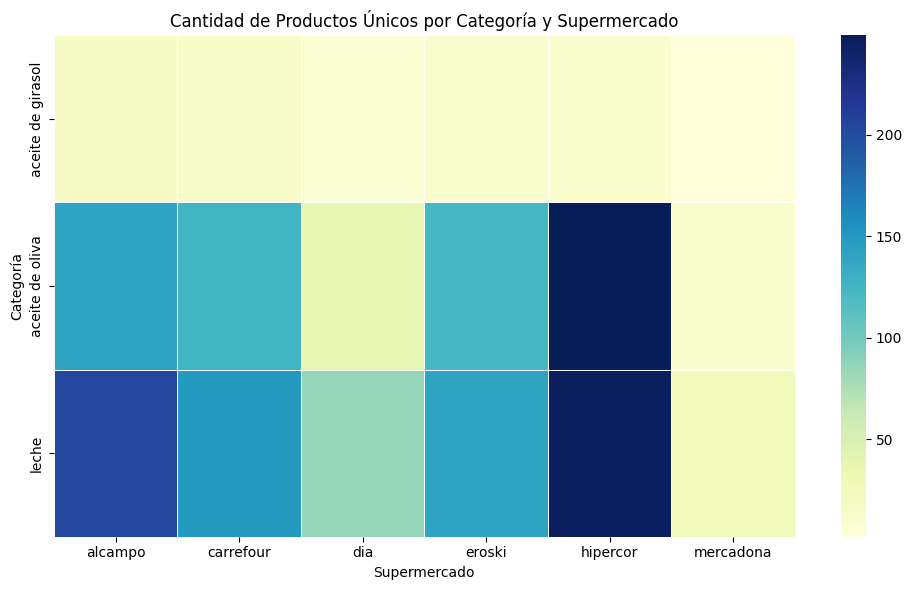

In [22]:
heatmap_data_unicos = df_query4.pivot(index='categoria', columns='super', values='numero')


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_unicos, fmt="d", cmap="YlGnBu", linewidths=.5, annot_kws={"size": 10})
plt.title('Cantidad de Productos Únicos por Categoría y Supermercado')
plt.xlabel('Supermercado')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()


#### Visualización 5

In [70]:
query5 = """
SELECT 
    p.fecha,
    p.precio,
    c.nombre AS categoria,
    s.nombre AS supermercado
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
JOIN 
    supermercados s ON p.id_supermercado = s.id
WHERE 
    p.fecha >= NOW() - INTERVAL '1 year';
"""

cursor.execute(query5)
df_query5 = pd.DataFrame(cursor.fetchall(), columns = ["fecha","precio","categoria","super"])
df_query5

,fecha,precio,categoria,super
0,2024-07-12,1.45,aceite de girasol,mercadona
1,2024-07-13,1.45,aceite de girasol,mercadona
2,2024-07-14,1.45,aceite de girasol,mercadona
3,2024-07-15,1.45,aceite de girasol,mercadona
4,2024-07-16,1.45,aceite de girasol,mercadona
...,...,...,...,...
275571,2024-10-23,4.73,leche,alcampo
275572,2024-10-24,4.73,leche,alcampo
275573,2024-10-25,4.73,leche,alcampo
275574,2024-10-26,4.73,leche,alcampo


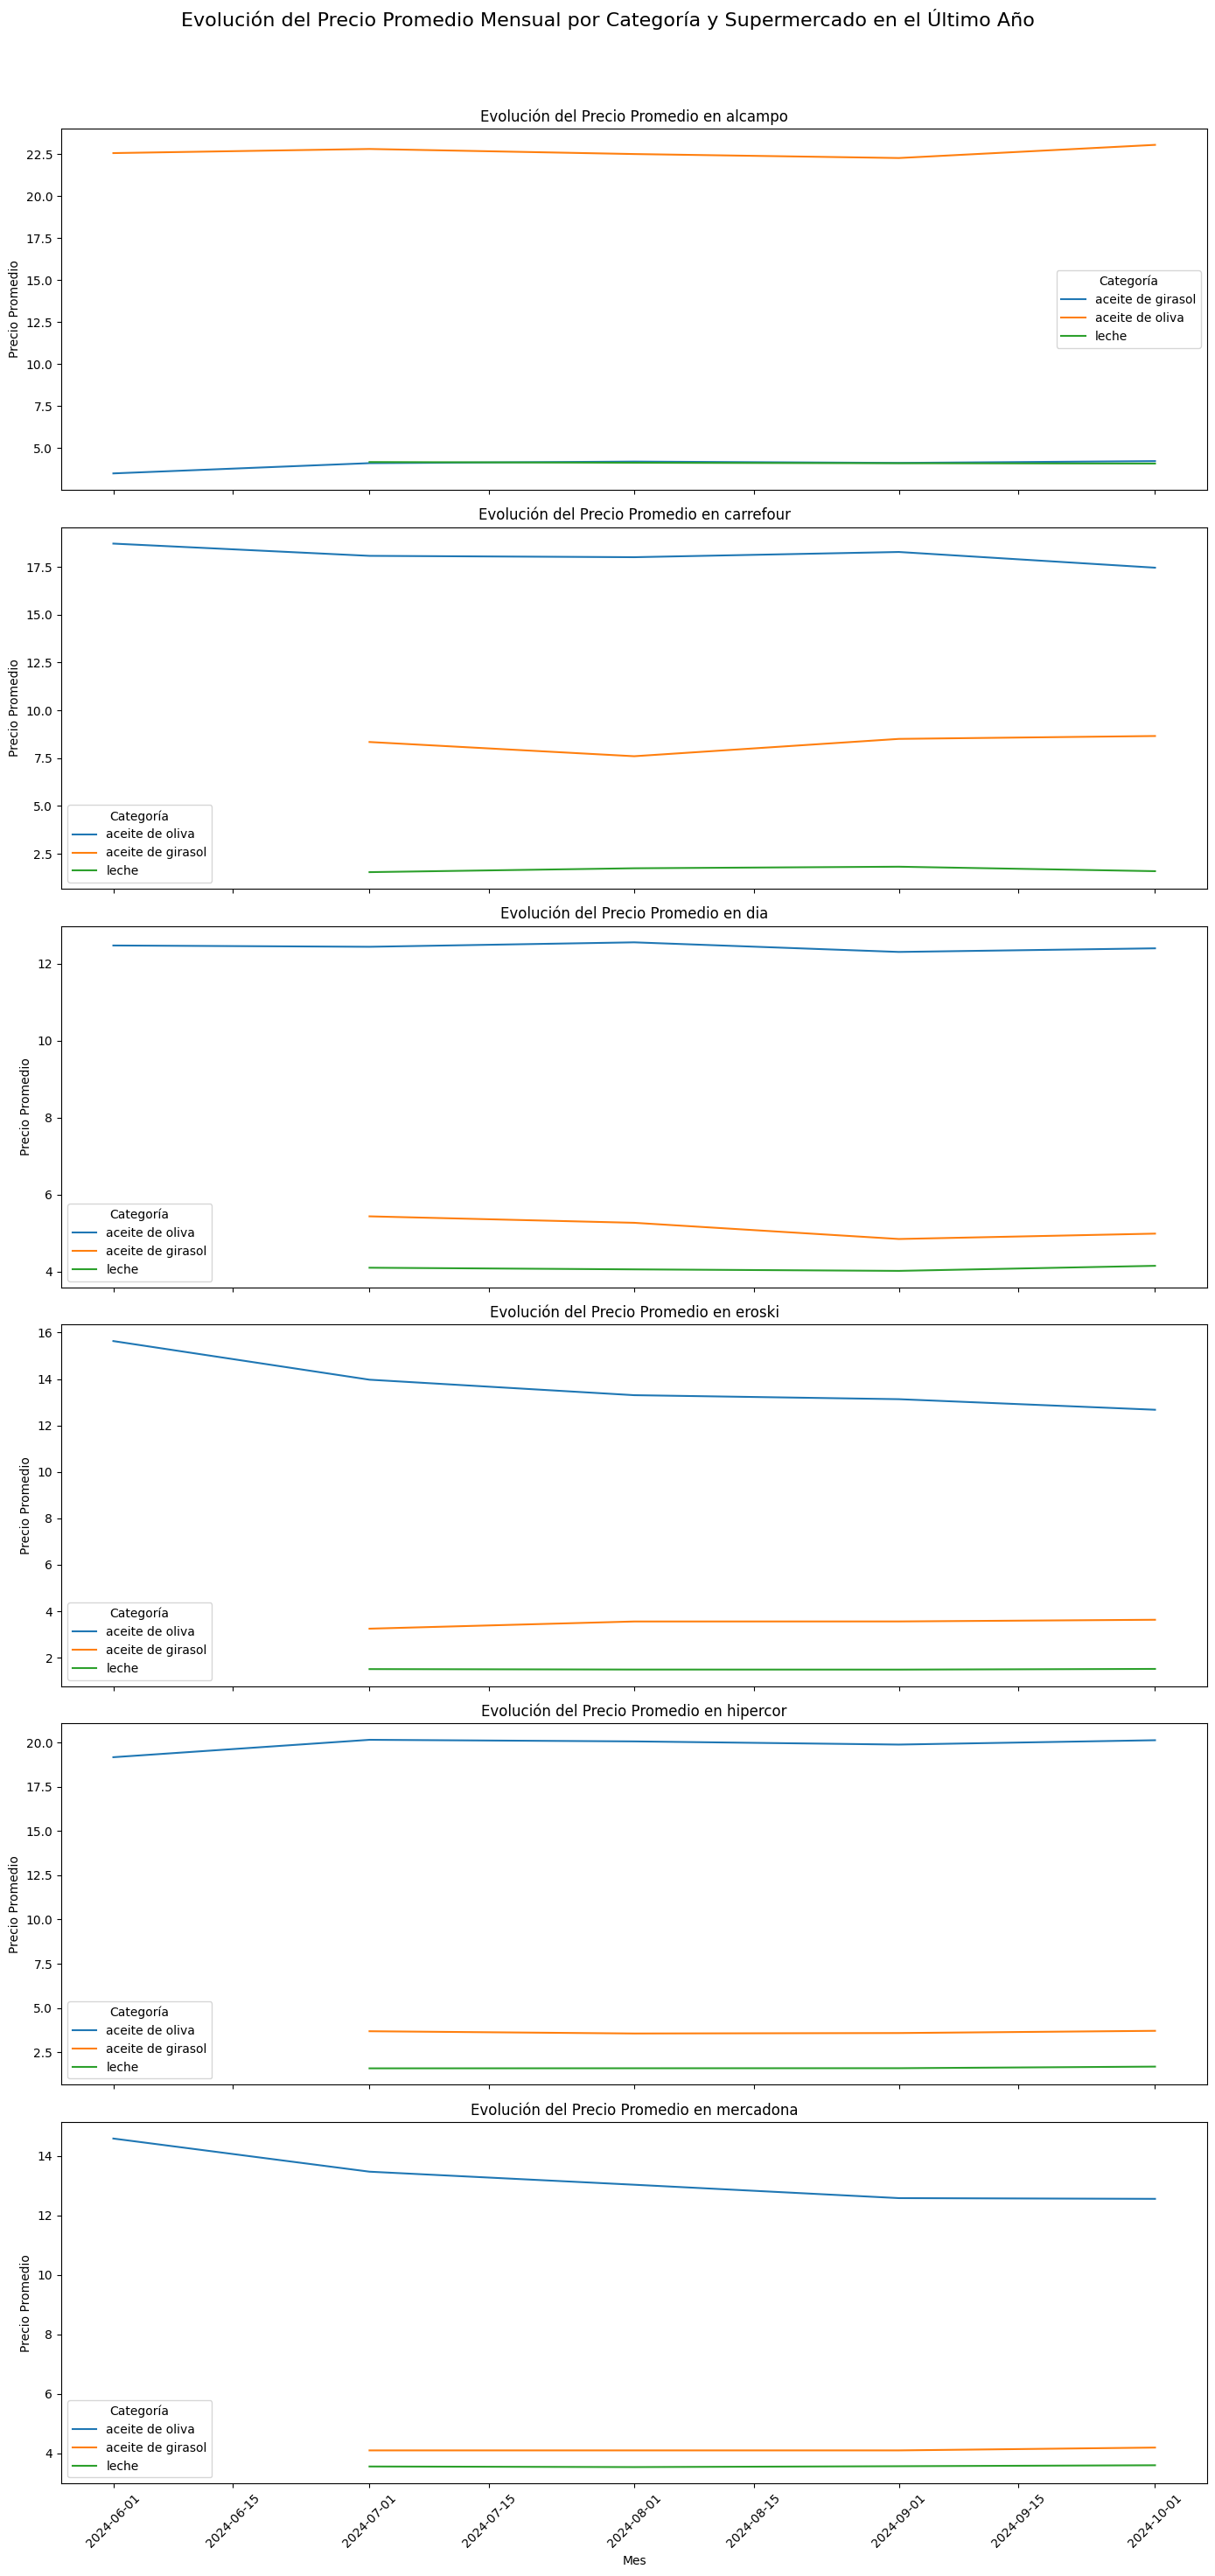

In [72]:
df_query5['fecha'] = pd.to_datetime(df_query5['fecha'])

df_query5 = df_query5.rename(columns={'super': 'supermercado'})

df_query5['mes'] = df_query5['fecha'].dt.to_period('M')
precio_promedio_mensual = df_query5.groupby(['mes', 'categoria', 'supermercado'])['precio'].mean().reset_index()

supermercados = precio_promedio_mensual['supermercado'].unique()
num_supermercados = len(supermercados)

fig, axes = plt.subplots(nrows=num_supermercados, ncols=1, figsize=(14, 5 * num_supermercados), sharex=True)

for ax, supermercado in zip(axes, supermercados):
    subset = precio_promedio_mensual[precio_promedio_mensual['supermercado'] == supermercado]
    for categoria in subset['categoria'].unique():
        data = subset[subset['categoria'] == categoria]
        ax.plot(data['mes'].dt.to_timestamp(), data['precio'], label=categoria)

    ax.set_title(f'Evolución del Precio Promedio en {supermercado}')
    ax.set_ylabel('Precio Promedio')
    ax.legend(title='Categoría')

plt.xlabel('Mes')
plt.suptitle('Evolución del Precio Promedio Mensual por Categoría y Supermercado en el Último Año', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Visualización 6

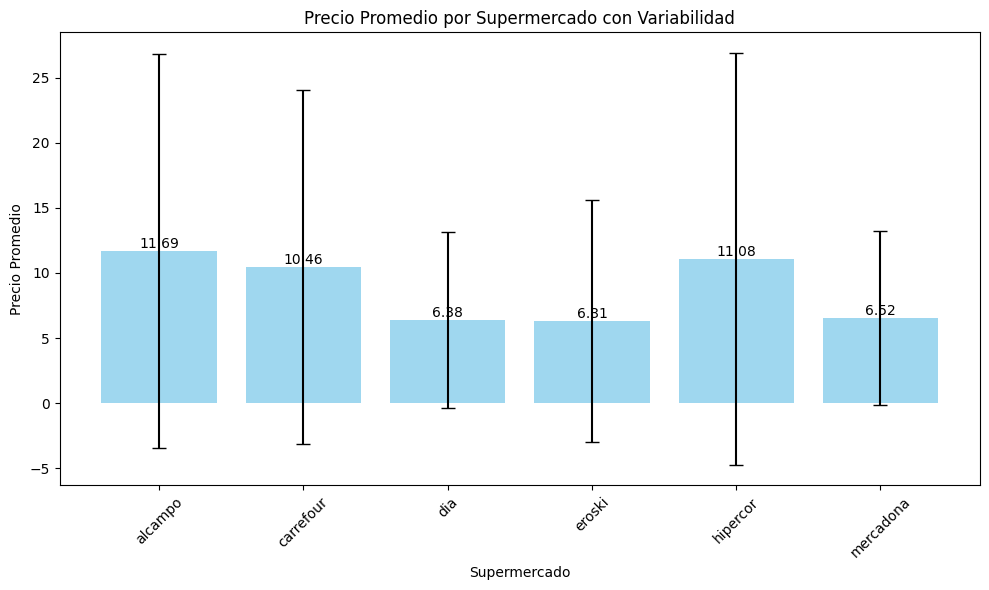

In [25]:
precio_stats_supermercado = df_query5.groupby('supermercado')['precio'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(precio_stats_supermercado['supermercado'], precio_stats_supermercado['mean'], 
               yerr=precio_stats_supermercado['std'], capsize=5, color='skyblue', alpha=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Precio Promedio por Supermercado con Variabilidad')
plt.xlabel('Supermercado')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
conn.rollback()

#### Visualización 7

In [26]:
query6 = """
SELECT 
    p.fecha,
    p.precio,
    c.nombre AS categoria
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
WHERE 
    p.fecha >= '2023-01-01';
"""

cursor.execute(query6)
df_query6 = pd.DataFrame(cursor.fetchall(), columns = ["fecha","precio","categoria"])
df_query6

,fecha,precio,categoria
0,2024-07-12,1.45,aceite de girasol
1,2024-07-13,1.45,aceite de girasol
2,2024-07-14,1.45,aceite de girasol
3,2024-07-15,1.45,aceite de girasol
4,2024-07-16,1.45,aceite de girasol
...,...,...,...
275571,2024-10-23,4.73,leche
275572,2024-10-24,4.73,leche
275573,2024-10-25,4.73,leche
275574,2024-10-26,4.73,leche


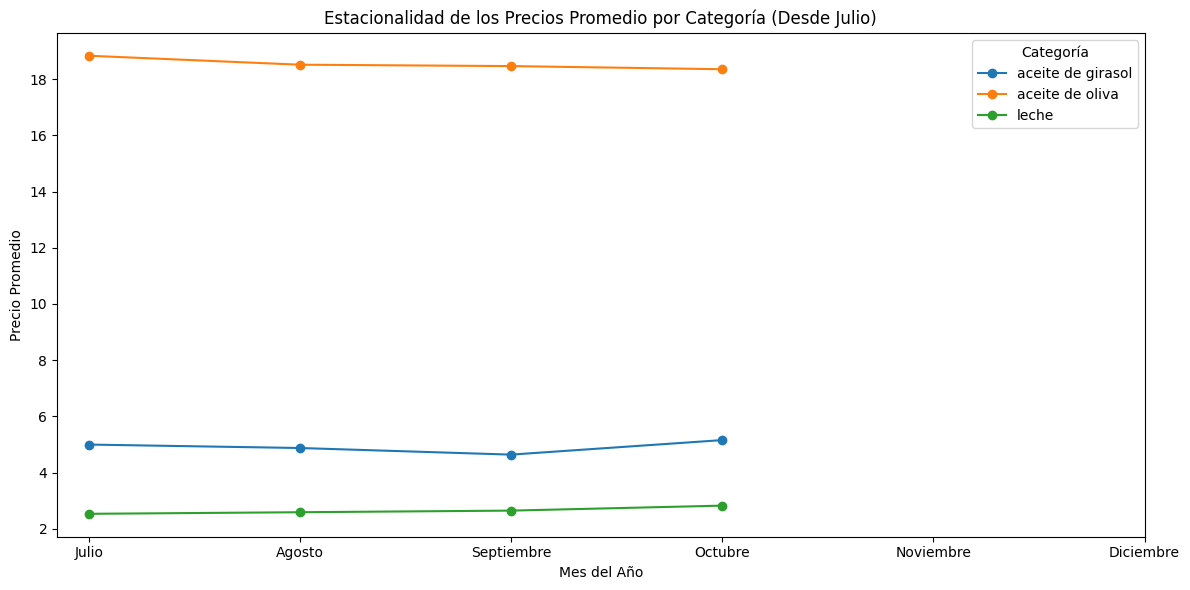

In [35]:
# Filtrar los datos para que solo se incluyan los meses desde julio en adelante
precio_promedio_mensual = precio_promedio_mensual[precio_promedio_mensual['mes'] >= 7]

# Visualización: Gráfico de líneas para la estacionalidad de los precios por categoría (desde julio en adelante)
plt.figure(figsize=(12, 6))
for categoria in precio_promedio_mensual['categoria'].unique():
    subset = precio_promedio_mensual[precio_promedio_mensual['categoria'] == categoria]
    plt.plot(subset['mes'], subset['precio'], label=categoria, marker='o')

plt.title('Estacionalidad de los Precios Promedio por Categoría (Desde Julio)')
plt.xlabel('Mes del Año')
plt.ylabel('Precio Promedio')
plt.legend(title='Categoría')
plt.xticks(range(7, 13), labels=['Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.tight_layout()
plt.show()



In [ ]:
!pip install plotly
!pip install nbformat
!pip install ipython nbformat




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Hago los gráficos interactivos

In [74]:
fig = px.line(precio_promedio_tiempo, 
              x='fecha', 
              y='precio', 
              color='categoria', 
              labels={'fecha': 'Fecha', 'precio': 'Precio Promedio', 'categoria': 'Categoría'},
              title='Tendencia de Precios a lo Largo del Tiempo por Categoría')

# Mostrar el gráfico interactivo
fig.show()

fig.write_html("Tendencia de precios a lo largo del tiempo por categoria.html")


In [68]:
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data_unicos.values,
    x=heatmap_data_unicos.columns,
    y=heatmap_data_unicos.index,
    colorscale='YlGnBu',
    colorbar=dict(title='Cantidad de Productos')
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Cantidad de Productos Únicos por Categoría y Supermercado',
    xaxis_title='Supermercado',
    yaxis_title='Categoría'
)

# Mostrar el gráfico interactivo
fig.show()
# Example for exporting an individual graph to an HTML file
fig.write_html("Cantidad de productos por super y categoria.html")


In [73]:
fig = make_subplots(rows=num_supermercados, cols=1, shared_xaxes=True, subplot_titles=supermercados)

# Agregar un gráfico de líneas para cada categoría en cada supermercado
for i, supermercado in enumerate(supermercados):
    subset = precio_promedio_mensual[precio_promedio_mensual['supermercado'] == supermercado]
    for categoria in subset['categoria'].unique():
        data = subset[subset['categoria'] == categoria]
        fig.add_trace(
            go.Scatter(x=data['mes'].dt.to_timestamp(), y=data['precio'], mode='lines', name=f'{categoria} - {supermercado}'),
            row=i + 1, col=1
        )

    # Configurar el título y etiquetas de los ejes
    fig.update_yaxes(title_text='Precio Promedio', row=i + 1, col=1)

# Configurar el layout de la figura
fig.update_layout(
    height=400 * num_supermercados,
    title_text='Evolución del Precio Promedio Mensual por Categoría y Supermercado en el Último Año',
    showlegend=True,
    xaxis_title='Mes'
)

# Mostrar el gráfico interactivo
fig.show()

fig.write_html("Evolucion del precio medio por mes y categoria (subplots).html")


In [77]:
# Crear el gráfico de barras interactivo con Plotly
fig = go.Figure()

# Añadir las barras con los valores del precio promedio y las barras de error
fig.add_trace(go.Bar(
    x=precio_stats_supermercado['supermercado'],
    y=precio_stats_supermercado['mean'],
    error_y=dict(type='data', array=precio_stats_supermercado['std'], visible=True),
    text=[f'{val:.2f}' for val in precio_stats_supermercado['mean']],  # Anotaciones
    textposition='outside',
    marker=dict(color='skyblue'),
    opacity=0.8,
    name='Precio Promedio'
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Precio Promedio por Supermercado con Variabilidad',
    xaxis_title='Supermercado',
    yaxis_title='Precio Promedio',
    xaxis_tickangle=45,
    showlegend=False
)

# Mostrar el gráfico interactivo
fig.show()


fig.write_html("precoPromedioporSupermercadoconVariabilidad.html")
